In [102]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [103]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set num of classes

In [104]:
NUM_CLASSES = 26

# Read dataset

In [105]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [106]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Build model

In [108]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [109]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_12 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [111]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model

In [112]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0078 - loss: 3.4122
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.0264 - loss: 3.3362 - val_accuracy: 0.0882 - val_loss: 3.3010
Epoch 2/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0234 - loss: 3.3455
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0239 - loss: 3.3141 - val_accuracy: 0.0966 - val_loss: 3.2827
Epoch 3/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0391 - loss: 3.2866
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0391 - loss: 3.2717 - val_accuracy: 0.1008 - val_loss: 3.2714
Epoch 4/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0391 - loss: 3.2540
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━

In [113]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8717 - loss: 0.6132


In [114]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [115]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[3.4386235e-06 3.1581102e-10 7.8159073e-06 5.6961506e-33 8.8553442e-11
 8.4659666e-17 7.3899105e-02 9.2608821e-01 1.1641741e-08 1.2428857e-08
 1.6827900e-33 3.5093639e-14 2.1036570e-19 1.5412626e-23 1.3791555e-06
 2.9333747e-14 3.3311836e-11 2.3223784e-20 2.7158487e-10 1.7627520e-14
 1.1082480e-21 3.4040263e-33 3.0657210e-20 1.1148374e-28 2.3711327e-18
 1.1576281e-24]
7


# Confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


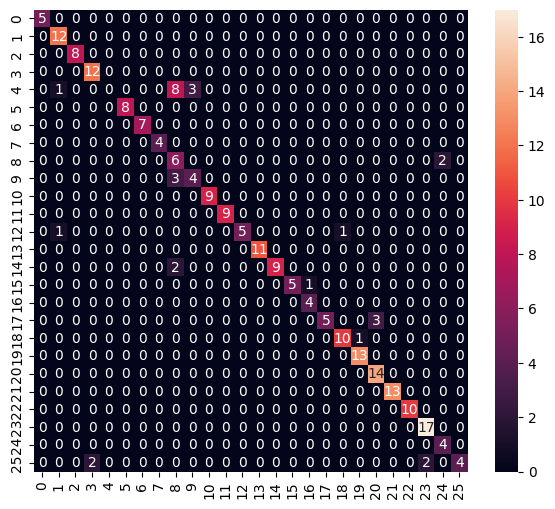

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00         8
           3       0.86      1.00      0.92        12
           4       0.00      0.00      0.00        12
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       0.32      0.75      0.44         8
           9       0.57      0.57      0.57         7
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         9
          12       1.00      0.71      0.83         7
          13       1.00      1.00      1.00        11
          14       1.00      0.82      0.90        11
          15       1.00      0.83      0.91         6
          16       0.80      1.00      0.89         4
     

c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model (for Tensorflow-Lite)

In [117]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [118]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\endpl\AppData\Local\Temp\tmpw6fw8a2z\assets


INFO:tensorflow:Assets written to: C:\Users\endpl\AppData\Local\Temp\tmpw6fw8a2z\assets


Saved artifact at 'C:\Users\endpl\AppData\Local\Temp\tmpw6fw8a2z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2398038882992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398249457744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398249830176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398178031600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398178031248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398178029488: TensorSpec(shape=(), dtype=tf.resource, name=None)


7540

# Inference test

In [119]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [120]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [121]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [122]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 5.05 ms


In [123]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.43863599e-06 3.15811599e-10 7.81594190e-06 5.69614955e-33
 8.85537546e-11 8.46602946e-17 7.38992989e-02 9.26088035e-01
 1.16417818e-08 1.24289015e-08 1.68278959e-33 3.50937033e-14
 2.10366454e-19 1.54126807e-23 1.37915902e-06 2.93336861e-14
 3.33118255e-11 2.32237791e-20 2.71585310e-10 1.76275857e-14
 1.10824774e-21 3.40402593e-33 3.06573168e-20 1.11483719e-28
 2.37113225e-18 1.15763247e-24]
7
